In [2]:
import os
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import glob
import cv2 as cv
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [3]:
import glob
import cv2 as cv

path = glob.glob("./roof_images/*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

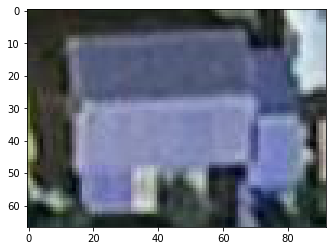

In [4]:
plt.imshow(cv_img[1000])

In [5]:
import glob
import cv2 as cv

path = glob.glob("E:/alaki/resized/roof_images/*.jpg")
resized_images = []
for img in path:
    n = cv.imread(img)
    resized_images.append(n)

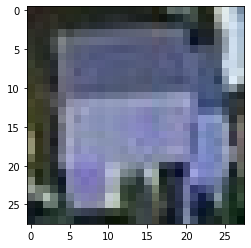

In [6]:
plt.imshow(resized_images[1000])

In [7]:
import numpy as np
resized_images=np.array(resized_images)


In [8]:
x_train, x_test = train_test_split(resized_images, test_size=0.30)

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3)) 

In [10]:
x_train = x_train.reshape(29931,3*28*28)
x_test = x_test.reshape(12828,3*28*28)



In [11]:
from sklearn import svm

In [12]:
clf=svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.001)

In [13]:
clf.fit(x_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.0001, shrinking=True, tol=0.001, verbose=False)

In [14]:
from sklearn.model_selection import StratifiedKFold    

In [15]:
y_pred_train=clf.predict(x_train)

In [16]:
y_pred_test=clf.predict(x_test)

In [17]:
n_error_train = y_pred_train[y_pred_train == -1].size


In [18]:
n_error_test = y_pred_test[y_pred_test == -1].size


In [19]:
print(n_error_train)

16


In [20]:
print(n_error_test)

11


In [21]:
#pred1=clf.predict(x_test)

In [22]:
print(y_pred_test)

[1 1 1 ... 1 1 1]


In [23]:
np.savetxt('E:/alaki/testresults.csv',y_pred_test, delimiter=',')

In [24]:

arr=[]

In [25]:
with open('E:/alaki/testresults.csv') as f:
    arr = [float(s) for line in f.readlines() for s in line[:-1].split(',')]
    print(arr);

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [26]:
for i in range(0, len(arr)):
    if arr[i]==-1.0:
        print(arr[i])

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [27]:
item = -1.0
np_array = np.array(arr)
item_index = np.where(np_array==item)
print(item_index)

(array([   24,   250,  1427,  2708,  5533,  7789,  9396,  9425, 11016,
       11503, 11726], dtype=int64),)


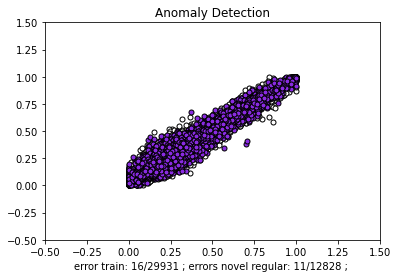

In [28]:

plt.title("Anomaly Detection")

s = 25
b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#plt.axis('tight')
#plt.autoscale(enable=True, axis='x', tight=False)
#plt.figure(figsize=(20,10))
plt.xlim((-0.5, 1.5))
plt.ylim((-0.5, 1.5))
'''
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
           
           
'''           
plt.xlabel(
    "error train: %d/29931 ; errors novel regular: %d/12828 ; "
    % (n_error_train, n_error_test))
plt.show()

C:\Users\Mehr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


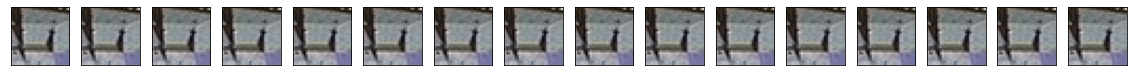

In [29]:
"""
n=16
plt.figure(figsize=(20, 4))
for q4 in range(0, len(arr)):
    for i in range(0, n):
        if np.where(np_array==-1.0):
            
            
                
                
                ax = plt.subplot(2, n, i + 1)
                plt.imshow(x_test[q4].reshape(28, 28, 3))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                

        
plt.show() 
"""

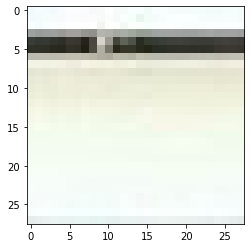

In [30]:
plt.imshow(x_test[24].reshape(28, 28, 3))
    

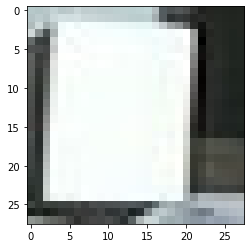

In [31]:
plt.imshow(x_test[250].reshape(28, 28, 3))

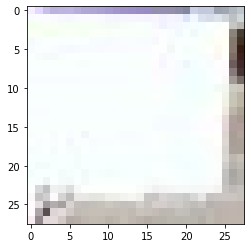

In [32]:
plt.imshow(x_test[1427].reshape(28, 28, 3))

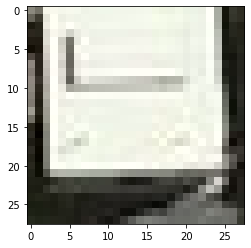

In [33]:
plt.imshow(x_test[2708].reshape(28, 28, 3))

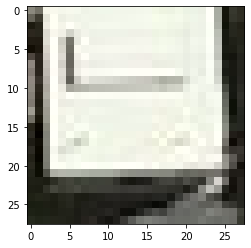

In [34]:
plt.imshow(x_test[5533].reshape(28, 28, 3))

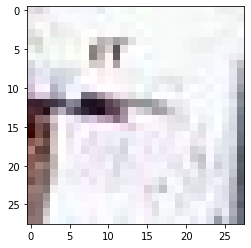

In [35]:
plt.imshow(x_test[7789].reshape(28, 28, 3))

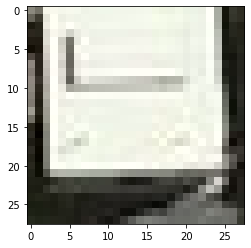

In [36]:
plt.imshow(x_test[9396].reshape(28, 28, 3))

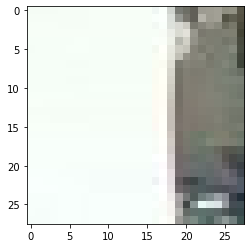

In [37]:
plt.imshow(x_test[9425].reshape(28, 28, 3))

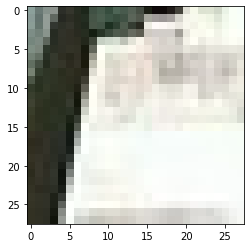

In [38]:
plt.imshow(x_test[11016].reshape(28, 28, 3))

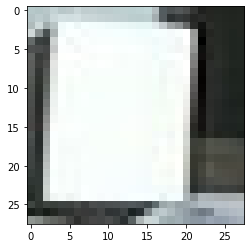

In [39]:
plt.imshow(x_test[11503].reshape(28, 28, 3))

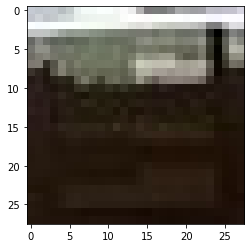

In [40]:
plt.imshow(x_test[11726].reshape(28, 28, 3))

C:\Users\Mehr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


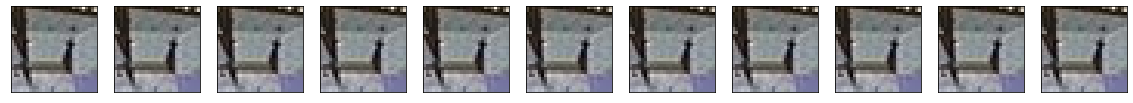

In [46]:

n=11
q4=0
plt.figure(figsize=(20, 4))
while q4 < len(arr):
    
        for i in range(0, n):
            if np.where(np_array== -1.0):
            
            
                
                
                ax = plt.subplot(2, n, i + 1)
                plt.imshow(x_test[q4].reshape(28, 28, 3))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
               
        q4+=1                  
                
                
                

        
plt.show() 
